### Simple Machine Learning Practice
- Follow a few kernels on writing and reading Python
- Haven't worked on DS in awhile so I will need a refresher
- Convert my R code to Python for more practice..?

### Content
- Following Kaggle kernels so if you see similar code then it probably is
    - Practice familiarizing myself with Python code and flow and not accuracy
- Data Summary
- Gather Data
- Import libraries
- Preprocessing data
- Cleaning data
- Explore the data
- Statistical Analysis
- Model the data
- Tune the data (Maybe)
    - Hyperparameter selection
    - Feature selection
- Validation
- Conclusion

### Areas of Study
- Modeling Framework
- Classification Problem
- Python Programming

In [1]:
# Set directory for the data
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv']

In [2]:
# Load environment and check for versions
import sys
print('Python version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import numpy as np
print('NumPy version: {}'.format(np.__version__))

import matplotlib as mpl
print('matplotlib version: {}'.format(mpl.__version__))

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

# Other libraries
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*30)

Python version: 3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
pandas version: 0.24.2
NumPy version: 1.16.3
matplotlib version: 3.1.0
IPython version: 7.5.0
scikit-learn version: 0.21.2
SciPy version: 1.3.0
------------------------------


### Load data modeling libraries

In [3]:
# Load model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common model helpers
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure matplotlib in Jupyter
%matplotlib inline
sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

print('Importing libraries...')

Importing libraries...


### Opening the data and gathering summary level analysis

#### Data column descriptions

1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The Age and Fare variable are continuous quantitative datatypes.
7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.


In [4]:
# Import the train and test data
train = pd.read_csv('07-train.csv')
test = pd.read_csv('07-test.csv')

# Copy train data
train_cp = train.copy(deep=True)

In [5]:
# Describe the training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Show first 5 rows of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Show last 5 rows of the dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
# Get shape (dimension) of training data
train.shape

(891, 12)

In [10]:
# Get column names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### The dependent variable is 'Survived'
- Survival Count = 342
- Non-Survival Count = 549

In [11]:
# Get survival count by using value_count - a series method so to apply to a dataframe, must subset
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
# Describe the training data with argument 'all' for the parameter include
# List of data types to be included while describing dataframe. Default is None
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sirota, Mr. Maurice",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Always check for NULL values

#### Using df.isnull() then summing it with .sum()

In [15]:
print('Train rows with null values:\n', train.isnull().sum())
print('-'*50)

Train rows with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------


In [16]:
print('Test rows with null values:\n', test.isnull().sum())
print('-'*50)

Test rows with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------------------------


#### Cleaning up the null values

There are several methods on how to handle missing values. There are always some instance where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted, and more. So understanding a couple methods in handling the NULL/NaN values are crucial. Pandas provides a dropna() function that can be used to drop either columns or rows with missing data.

Some methods are listed below:

1. Removing the rows with missing values using dropna() function
    - inplace parameter: If True, do operation inplace and return None.
    - axis parameter: drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
2. Impute the missing values using fillna():
    - Constant value that has meaning within the domain; ex: 0 for not present
    - Value from another randomly selected record (could be random or have the business acumen to figure out a value)
    - Mean, median, mode
    - Value estimated by a predictive model
3. Binning
    - Binning the values that are not present which could provide insight
4. Ignore and leave it as it is

In [17]:
# Get imputed values first so we can apply it to the test set as well
train_age_median = train['Age'].median()
train_embarked_mode = train['Embarked'].mode()
train_fare_median = train['Fare'].median()

impute_list = ['Age', 'Embarked', 'Fare']

#Loop through missing values in the training set and fillna() missing values
for col in impute_list:
    if train[col].dtypes in ['int64', 'float64', 'int32', 'float32']:
        
        # age with median
        print('Replacing missing values in ' + str(col) + '...')
        train[col].fillna(train[col].median(), inplace=True)
        
        # fare with median
        train[col].fillna(train[col].median(), inplace=True)
        
    else:
        print('-'*10)
        # embarked with mode
        print('Replacing missing values in ' + str(col) + '...')
        train[col].fillna(train[col].mode(), inplace=True)

Replacing missing values in Age...
----------
Replacing missing values in Embarked...
Replacing missing values in Fare...


In [18]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
# Check null values again for train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Feature engineering

In [20]:
# Create a new feature called FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Create a new feature called IsAlone
train['IsAlone'] = 1
train['IsAlone'].loc[train['FamilySize'] > 1] = 0

# Create a new feature called title
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')

In [21]:
# train.loc[,['FamilySize', 'IsAlone', 'Title']].head()
train.loc[1:5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,Mr


In [199]:
train.iloc[1:5].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [22]:
train[['FamilySize', 'IsAlone', 'Title']].head()

,FamilySize,IsAlone,Title
0,2,0,Mr
1,2,0,Mrs
2,1,1,Miss
3,2,0,Mrs
4,1,1,Mr


In [23]:
type(train)

pandas.core.frame.DataFrame

In [24]:
##### Create a test df to make sure my functions are working properly
combine = train.copy()

combine['Title'] = combine['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combine['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [25]:
# Use pd.crosstab() to generate frequency for multiple features
pd.crosstab(combine['Title'], combine['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [200]:
type(pd.crosstab(combine['Title'], combine['Survived']))

pandas.core.frame.DataFrame

In [26]:
# Instead of pd.crosstab(col1, col2), use value_counts() to create a frequency table
combine['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Don           1
Mme           1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [27]:
# Frequency table for column 'Sex'
combine['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
# Use .qcut() to bin and discretized values into more evenly distributed bins
combine['FareBin'] = pd.qcut(combine['Fare'], 4)
train['FareBin'] = pd.qcut(train['Fare'], 4)

In [29]:
# Group titles together
female_list = ['Countess', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs', 'Ms']
royal_list = ['Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Sir', 'Master']
male_list = ['Capt', 'Mr', 'Rev']

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Don           1
Mme           1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [30]:
train[train['Title'].isin(male_list)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr,"(-0.001, 7.91]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,Mr,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,Mr,"(31.0, 512.329]"
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1,1,Mr,"(7.91, 14.454]"
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,7,0,Mr,"(31.0, 512.329]"
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S,1,1,Mr,"(7.91, 14.454]"
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,1,1,Mr,"(14.454, 31.0]"
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1,1,Mr,"(7.91, 14.454]"
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,1,Mr,"(31.0, 512.329]"


In [31]:
train[train['Title'].isin(royal_list)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,5,0,Master,"(14.454, 31.0]"
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,6,0,Master,"(14.454, 31.0]"
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,NaN,C,1,1,Don,"(14.454, 31.0]"
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,6,0,Master,"(31.0, 512.329]"
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,8,0,Master,"(31.0, 512.329]"
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,6,0,Master,"(14.454, 31.0]"
65,66,1,3,"Moubarek, Master. Gerios",male,28.00,1,1,2661,15.2458,NaN,C,3,0,Master,"(14.454, 31.0]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,3,0,Master,"(14.454, 31.0]"
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,2,0,Master,"(7.91, 14.454]"
159,160,0,3,"Sage, Master. Thomas Henry",male,28.00,8,2,CA. 2343,69.5500,NaN,S,11,0,Master,"(31.0, 512.329]"


In [32]:
# Frequency table for royal list titles
train[train['Title'].isin(royal_list)]['Title'].value_counts()

Master      40
Dr           7
Major        2
Col          2
Don          1
Jonkheer     1
Sir          1
Name: Title, dtype: int64

In [33]:
# Frequency table for male list titles
train[train['Title'].isin(male_list)]['Title'].value_counts()

Mr      517
Rev       6
Capt      1
Name: Title, dtype: int64

In [34]:
# Frequency table for female list titles
train[train['Title'].isin(female_list)]['Title'].value_counts()

Miss        182
Mrs         125
Mlle          2
Lady          1
Ms            1
Countess      1
Mme           1
Name: Title, dtype: int64

In [35]:
train[train['Title'].isin(royal_list)]['Title'].isin(royal_list).head()

7     True
16    True
30    True
50    True
59    True
Name: Title, dtype: bool

In [36]:
# Create new feature for grouped titles
train['NewTitle'] = train['Title']

def title_change(df, title_list, new_title):
    for i in df['Title']:
        if df['Title'].isin(title_list)[i]:
            print('Updating titles...')


In [37]:
train['Title'].isin(royal_list).head()

0    False
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [38]:
train['Title'][1]

'Mrs'

In [39]:
train['Title'].isin(royal_list)[1]

False

In [40]:
# Update new titles
train.loc[(train['Title'].isin(female_list)), 'NewTitle'] = 'Female'
train.loc[(train['Title'].isin(male_list)), 'NewTitle'] = 'Male'
train.loc[(train['Title'].isin(royal_list)), 'NewTitle'] = 'Rare'

train['NewTitle'].value_counts()

Male      524
Female    313
Rare       54
Name: NewTitle, dtype: int64

# Part 2 -----------------------------------------------------------------------------

In [41]:
# Import the train and test data
import pandas as pd
ntrain = pd.read_csv('07-train.csv')
ntest = pd.read_csv('07-test.csv')

In [42]:
# Peek the datasets
ntrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
ntest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
# Get shape and info of the columns
print('shape: ' + str(ntrain.shape))
print(ntrain.info())

shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Data Types

#### Categorical

Nominal
- variables that have two or more categories but no order
    - cabin, embarked

Dichotomous
- nominal variables with only two categories
    - sex

Ordinal
- variables that have two or more categories that can be ordered or ranked

#### Numeric

Discrete
- variables that have is a number with that is finite and can only take on certain values
    - passenger id, sibsp, parch, survived

Continuous
- variables that is a number that can take on any value within a range
    - age
    - fare
    
#### Text

Strings
- data in various forms of text and numbers
    - ticket
    - name

In [45]:
# Data info again
print ("*"*40)
print('********** train shape: ' + str(ntrain.shape) + '*'*10)
print (ntrain.info())
print ("*"*40)
print('********** test shape: ' + str(ntest.shape) + '*'*10)
print (ntest.info())

****************************************
********** train shape: (891, 12)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
********** test shape: (418, 11)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null objec

### Preprocessing - missing values

#### Missing values in the ntrain set

In [46]:
# Create a variable to get null and index using the new variable and count.sum
totalnull = ntrain.isnull().sum().sort_values(ascending=False)

In [47]:
totalnull

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [48]:
percentnull = round(ntrain.isnull().sum().sort_values(ascending=False)/len(ntrain)*100,2)
percentnull

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [49]:
# Combine the null variables horizontally so axis=1
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### Missing values in the ntest set

In [50]:
# Get totals and percentages of nulls in the ntest set
totalnull_test = ntest.isnull().sum().sort_values(ascending=False)
percentnull_test = round(ntest.isnull().sum().sort_values(ascending=False)/len(ntest)*100, 2)

# Combine using axis=1 for horizontal merges
pd.concat([totalnull_test, percentnull_test], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### Embarked

In [51]:
# Create a df and get values in the embarked feature and percentages using value_count()
embarked_total = pd.DataFrame(ntrain.Embarked.value_counts(dropna=False))
embarked_percent = pd.DataFrame(round(ntrain.Embarked.value_counts(dropna=False, normalize=True)*100, 2))

# Rename columns
embarked_total.columns = ['Total']
embarked_percent.columns = ['Percent']

# Merge the two dataframes into one using axis=1 for horizontal merge
pd.concat([embarked_total, embarked_percent], axis=1)

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [52]:
print(type(totalnull_test))
print(type(embarked_total))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [53]:
# View the nulls
ntrain[ntrain.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Embarked locations
C = Cherbourg, Q = Queenstown, S = Southampton

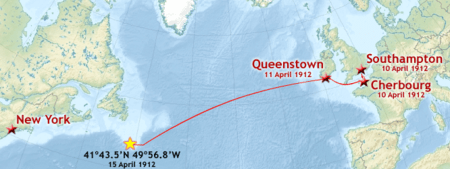

In [54]:
from IPython.display import Image
url = 'https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png'
Image(url,width=600, height=800)

### Assigning 'C' did not work below.

In [55]:
# Setting embarked nulls to Cherbourg based on survival rate, gender, and fare (both from the same cabin)
ntrain[ntrain.Embarked.isnull()].loc['Embarked'] = 'C'

In [56]:
null_embarked = ntrain[['Embarked']].isnull().head() # = 'C'
null_embarked.head()

,Embarked
0,False
1,False
2,False
3,False
4,False


In [57]:
ntrain[ntrain.Embarked.isnull()].Embarked

61     NaN
829    NaN
Name: Embarked, dtype: object

In [58]:
ntrain2 = ntrain.copy()

In [59]:
# Trying to see if replacing nulls is similar to R...
ntrain2[null_embarked][['Embarked']] = 'C'

In [60]:
ntrain2.Embarked.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Embarked, dtype: bool

In [61]:
# Result: Nope or i'm probably doing it wrong
ntrain2.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [62]:
# Get totals and percentages of nulls in the ntrain set
totalnull = ntrain.isnull().sum().sort_values(ascending=False)
percentnull = round(ntrain.isnull().sum().sort_values(ascending=False)/len(ntrain)*100, 2)

# Combine using axis=1 for horizontal merges
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [63]:
# Create a table of survived vs. embarked
embarked_survival = pd.crosstab(index=ntrain['Embarked'],
                               columns=ntrain['Survived'])

# Set names for index and columns if needed
# embarked_survival.columns = ["Did not Survive", "Survived"]
# embarked_survival.index= ["C","Q", "S"]

embarked_survival

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


#### pd.crosstab(df.A,df.B, normalize='index')
crosstab with percentages using normalize parameter?
- index: rows
- columns
- all

#### Include totals using margins() parameter and passing True as the argument

In [64]:
# Create a table of survived vs. embarked
embarked_survival = pd.crosstab(index=ntrain['Embarked'],
                               columns=ntrain['Survived'],
                               margins=True)

# Set names for index and columns if needed
embarked_survival.columns = ["Did not Survive", "Survived", "RowTotal"]
embarked_survival.index= ["C", "Q", "S", "ColTotal"]

embarked_survival

,Did not Survive,Survived,RowTotal
C,75,93,168
Q,47,30,77
S,427,217,644
ColTotal,549,340,889


To get the total proportion of counts in each cell, divide the table by the grand total

In [65]:
embarked_survival/embarked_survival.loc['ColTotal', 'RowTotal']

,Did not Survive,Survived,RowTotal
C,0.084364,0.104612,0.188976
Q,0.052868,0.033746,0.086614
S,0.480315,0.244094,0.724409
ColTotal,0.617548,0.382452,1.000000


In [66]:
embarked_survival/embarked_survival.loc['ColTotal']

,Did not Survive,Survived,RowTotal
C,0.136612,0.273529,0.188976
Q,0.085610,0.088235,0.086614
S,0.777778,0.638235,0.724409
ColTotal,1.000000,1.000000,1.000000


In [67]:
round(embarked_survival/embarked_survival.loc['ColTotal']*100,1)

,Did not Survive,Survived,RowTotal
C,13.7,27.4,18.9
Q,8.6,8.8,8.7
S,77.8,63.8,72.4
ColTotal,100.0,100.0,100.0


In [68]:
# Create a table of embarked vs. survival
survived_embarked = pd.crosstab(index=ntrain['Survived'],
                               columns=ntrain['Embarked'],
                               margins=True)

# Set names for index and columns if needed
survived_embarked.index = ["Did not Survive", "Survived", "ColTotal"]
survived_embarked.columns= ["C", "Q", "S", "RowTotal"]

survived_embarked

,C,Q,S,RowTotal
Did not Survive,75,47,427,549
Survived,93,30,217,340
ColTotal,168,77,644,889


In [69]:
round(survived_embarked/survived_embarked.loc['ColTotal']*100,1)

,C,Q,S,RowTotal
Did not Survive,44.6,61.0,66.3,61.8
Survived,55.4,39.0,33.7,38.2
ColTotal,100.0,100.0,100.0,100.0


In [70]:
pd.crosstab(ntrain['Survived'], ntrain['Embarked'], )

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [71]:
surv_embarked_class = pd.crosstab(index=ntrain["Survived"], 
                                  columns=[ntrain["Pclass"],
                                           ntrain["Embarked"]],
                                  margins=True)   # Include row and column totals

surv_embarked_class

Pclass     1           2           3           All
Embarked   C  Q    S   C  Q    S   C   Q    S     
Survived                                          
0         26  1   53   8  1   88  41  45  286  549
1         59  1   74   9  2   76  25  27   67  340
All       85  2  127  17  3  164  66  72  353  889

In [72]:
surv_embarked_class/surv_embarked_class.loc['All']

Pclass           1                        2                             3  \
Embarked         C    Q         S         C         Q         S         C   
Survived                                                                    
0         0.305882  0.5  0.417323  0.470588  0.333333  0.536585  0.621212   
1         0.694118  0.5  0.582677  0.529412  0.666667  0.463415  0.378788   
All       1.000000  1.0  1.000000  1.000000  1.000000  1.000000  1.000000   

Pclass                          All  
Embarked      Q         S            
Survived                             
0         0.625  0.810198  0.617548  
1         0.375  0.189802  0.382452  
All       1.000  1.000000  1.000000

### Using the fillna() function worked, but would only want to do this is changing entire column

In [73]:
# Fillna() - inplace = replace if True
ntrain['Embarked'].fillna('C', inplace=True)

### Embarked plot

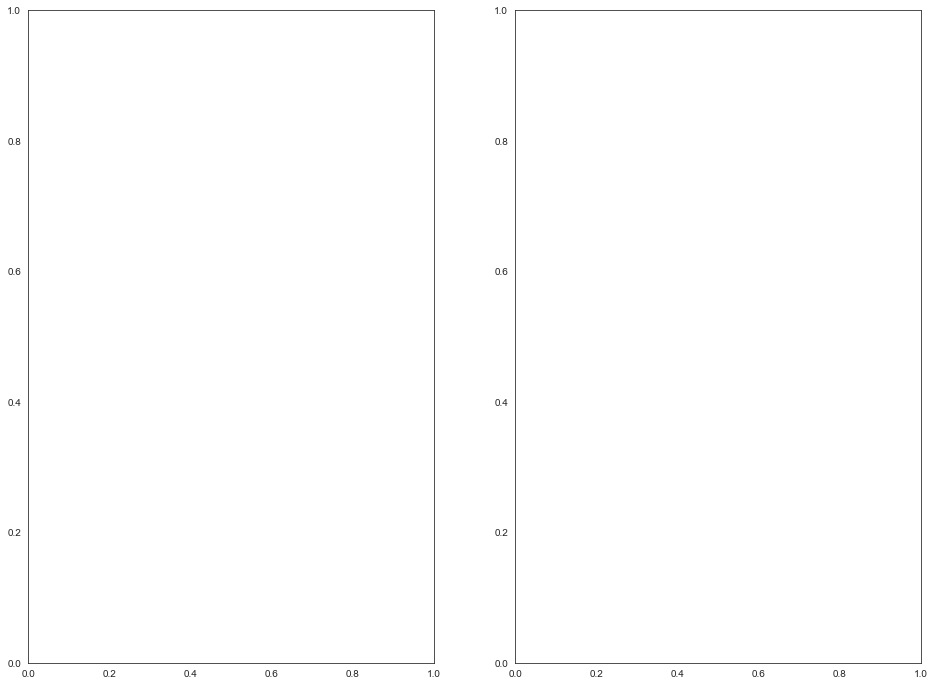

In [74]:
# Plotting embarked feature - create the plot sizes
fig, ax = plt.subplots(figsize=(16,12), ncols=2)

Text(0.5, 1.0, 'Test Set')

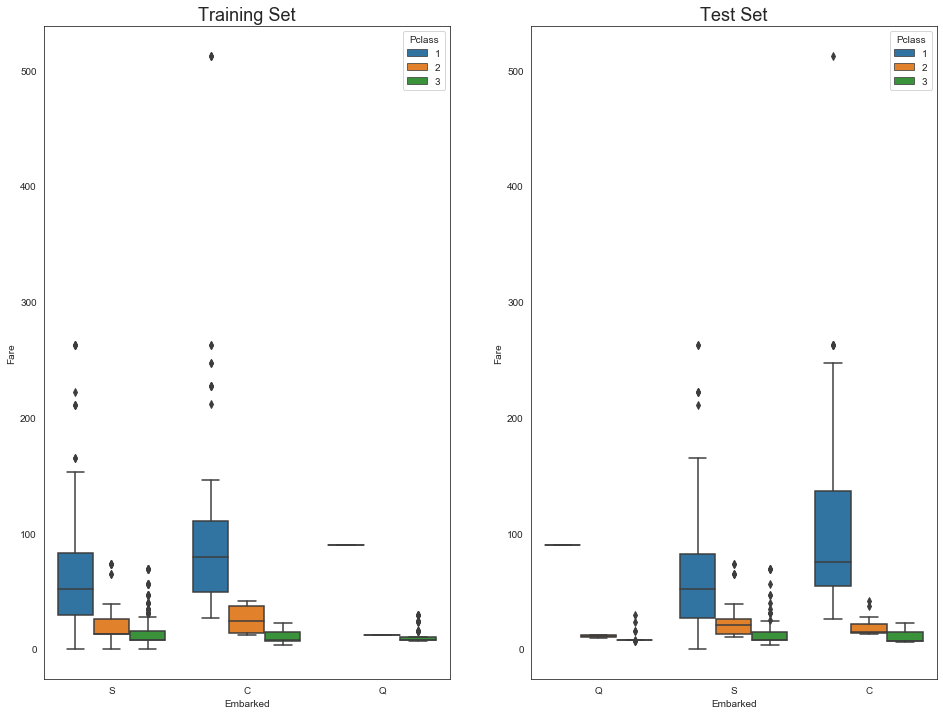

In [75]:
import seaborn as sns
import matplotlib
# matplotlib.use('TkAgg')
matplotlib.use('PS')
from matplotlib import pyplot as plt

# Plotting figure sizes
fig, ax = plt.subplots(figsize=(16,12), ncols=2)

# Use boxplot function from seaborn
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=ntrain, ax=ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=ntest, ax=ax[1])

# Set titles
ax1.set_title('Training Set', fontsize=18)
ax2.set_title('Test Set', fontsize=18)

# Show figures
# fig.show() - warning so this useless until i get matplotlib to use TkAgg

##### Looks like the person also set the nulls to C after plotting it

- Their reason was that the average fare closest to $80 are in the C values.
- My method was to search for some insight where each locations were located and if there was a wealth gap between the cities then create proportion tables to see which values also had the highest survival rate since
    - Looking at the features
        1. Both these people were in the same room
        2. Has pretty above average fare prices
        3. Females
        4. Survived

### Cabin feature

In [76]:
# Get null values
ntrain.Cabin.isnull().sum()

687

In [77]:
print('Train Cabin Missing Values Proportion: ' + str(ntrain.Cabin.isnull().sum()/len(ntrain.Cabin)*100))

Train Cabin Missing Values Proportion: 77.10437710437711


In [78]:
# Print test cabin missing value proportion
print('Test Cabin Missing Value Proportion: ' + str(ntest.Cabin.isnull().sum()/len(ntest.Cabin)*100))

Test Cabin Missing Value Proportion: 78.22966507177034


It looks like there is a high amount of missing values in the Cabin feature for both the data sets.
- We can either not use this feature at all
- Discover methods to utilize feature engineering to make it usable
- Ask questions like:
    - Why are there so many missing Cabin values?
    - Survival rate of people with Cabins?
    - Socioeconomic status of Cabins?
    - Cabins closest to lifeboats?

In [100]:
# Add in a survived feature for the test dataset
ntest.Survived = np.nan

In [101]:
# Combine the datasets and input null value for test survived
all_data = pd.concat([ntrain, ntest], ignore_index=False)

In [102]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [103]:
# Assign the Cabin null values to N using fillna()
all_data.Cabin.fillna('N', inplace=True)

All the cabin names start with a letter followed by digits. It looks like there are some passengers that have booked multiple cabin rooms in their name. This could be because that they travelled together with family. Even if the letter was different, there seems to be significance with the letters instead of the numbers.

In [104]:
# Get individual indexed values per row
all_data.Cabin = [i[0] for i in all_data.Cabin]
all_data.Cabin[0:5]

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [105]:
# Summarize the groups with their fares using groupby() function
with_N = all_data[all_data.Cabin=='N']
without_N = all_data[all_data.Cabin!='N']

# Group by cabin, get Fare column and get the mean value
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [106]:
all_data.groupby('Cabin')['Fare'].median().sort_values()

Cabin
N    10.5000
F    13.0000
G    16.7000
A    35.0771
T    35.5000
D    52.5542
E    53.1000
B    82.2667
C    86.2896
Name: Fare, dtype: float64

In [107]:
# Create a function to give cabin names based on values
def cabin_estimate(x):
    letter = 0
    if x<16:
        letter='G'
    elif x>=16 and x<27:
        letter='F'
    elif x>=27 and x<38:
        letter='T'
    elif x>=38 and x<47:
        letter='A'
    elif x>=47 and x<53:
        letter='E'
    elif x>=53 and x<54:
        letter='D'
    elif x>=54 and x<116:
        letter='C'
    else:
        letter='B'
    return letter

In [108]:
# Apply cabin function in each unknown cabins (N values)
with_N['Cabin'].head()
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimate(x))

In [109]:
# Getting back train
all_data = pd.concat([with_N, without_N], axis=0)

In [110]:
print(with_N.shape)
print(without_N.shape)

(1014, 12)
(295, 12)


In [118]:
# Sort by ID to begin separating
all_data.sort_values(by='PassengerId', inplace=True)

# Separate the two datasets
train = all_data[:891]
test = all_data[891:]

In [119]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


#### Fare feature

There was one null value in fare feature in the test dataset.

In [120]:
test[test.isnull().Fare]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,B,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [121]:
test[test.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,B,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


We can do a dirty method and just add in an average failure for the passenger type based on cabin, age, sex, etc.

In [125]:
# Get attributes and index the values to get the mean
missing_fare = round(test[(test.Pclass==3) & (test.Embarked=='S') & (test.Sex=='male')].Fare.mean(),2)
print('Avg Fare for Pclass = 3, Embarked = S, Sex = M: ' + str(missing_fare))

# Replace null fare
test.Fare.fillna(missing_fare, inplace=True)

Avg Fare for Pclass = 3, Embarked = S, Sex = M: 12.72


In [129]:
# Check for nulls again
print(test.isnull().sum().sort_values(ascending=False))
print('*'*30)
print(train.isnull().sum().sort_values(ascending=False))

Survived       418
Age             86
Ticket           0
SibSp            0
Sex              0
Pclass           0
PassengerId      0
Parch            0
Name             0
Fare             0
Embarked         0
Cabin            0
dtype: int64
******************************
Age            177
Ticket           0
Survived         0
SibSp            0
Sex              0
Pclass           0
PassengerId      0
Parch            0
Name             0
Fare             0
Embarked         0
Cabin            0
dtype: int64


#### Age feature

In [136]:
# Print out the missing values
print('Missing values in the age feature for the train set: ' + str(round(train.Age.isnull().sum()/len(train)*100,1)) + str('%'))

print('Missing values in the age feature for the train set: ' + str(round(test.Age.isnull().sum()/len(test)*100,1)) + str('%'))

Missing values in the age feature for the train set: 19.9%
Missing values in the age feature for the train set: 20.6%


Replacing it with a summary statistics may not be useful because age could determine the survival rate. Kids and older people have higher chance of survival. We could attempt to use an algorithm to see if we can model something for this feature instead.

### Age plot

Text(0.5, 1.0, 'Training Set: Cabin vs. Age for Survival Rate')

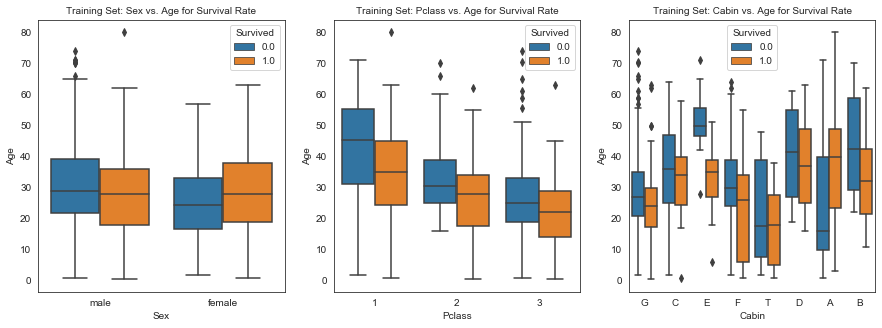

In [157]:
import seaborn as sns
import matplotlib
matplotlib.use('PS')
import matplotlib.pyplot as plt

# Plot empty figure sizes using plt.subplots()
fig, ax = plt.subplots(figsize=(15,5), ncols=3, nrows=1)

# Create boxplots from the seaborn library: sns.boxplot()
ax1 = sns.boxplot(x='Sex', y='Age', hue='Survived', data=train, ax=ax[0])
ax2 = sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train, ax=ax[1])
ax3 = sns.boxplot(x='Cabin', y='Age', hue='Survived', data=train, ax=ax[2])

# # Set titles
ax1.set_title('Training Set: Sex vs. Age for Survival Rate', fontsize=10)
ax2.set_title('Training Set: Pclass vs. Age for Survival Rate', fontsize=10)
ax3.set_title('Training Set: Cabin vs. Age for Survival Rate', fontsize=10)

Based on these three plots and some inferences made from my previous work on this dataset...

These following groups have a higher survival rate than normal:
- Female
- Kids
- Older Adults
- Higher socioeconomic status people (high fares, good cabins, pclass, etc.)
- More to come such as titles, family size, child groups

### Gender and survived bar plots

Text(0.5, 0, 'Sex')

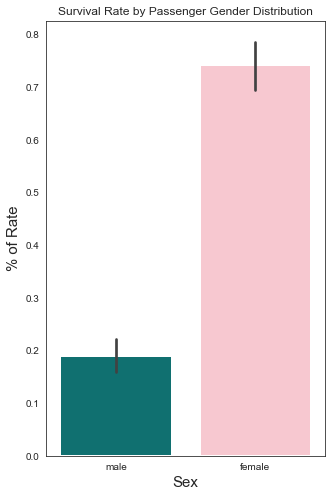

In [182]:
# Dictionary of clolors by value
colors = {'male': 'teal', 'female': 'pink'}

# Use plot.subplots() to generate empty space then barplots using sns.barplot()
plt.subplots(figsize=(5,8))

# Barplots
ax = sns.barplot(x='Sex', y='Survived', data=train, palette=colors, linewidth=2)
                #estimator=(lambda x: len(x)/len(train)*100))

# Title
plt.title('Survival Rate by Passenger Gender Distribution')
plt.ylabel('% of Rate', fontsize=15)
plt.xlabel('Sex', fontsize=15)

#### The survival rates of females are disproportional to males as expected

In [176]:
# Check survival rate in a crosstab
sex_survived = pd.crosstab(index=train['Survived'], columns=train['Sex'], margins=True)
sex_survived.index = ['Did not Survive', 'Survived', 'ColTotal']
round(sex_survived/sex_survived.loc['ColTotal']*100,1)

Sex,female,male,All
Did not Survive,25.8,81.1,61.6
Survived,74.2,18.9,38.4
ColTotal,100.0,100.0,100.0


### Passenger gender distribution survival count

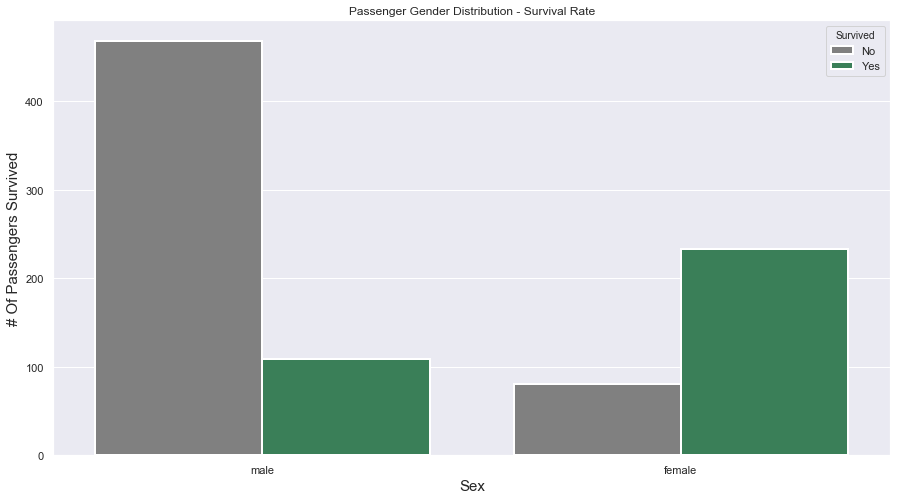

In [189]:
# Create color for palette
colors = {1: 'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Begin with creating empty figure size with plt.subplots()
plt.subplots(figsize=(15,8))

# Create the plot using sns.countplot()
ax = sns.countplot(x='Sex',
                   hue='Survived',
                   data=train,
                   linewidth=2,
                   palette=colors
                   )

# Set titles and labels
plt.title('Passenger Gender Distribution - Survival Rate')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('# Of Passengers Survived', fontsize=15)

# Add legend
lgd = ax.get_legend()

# Set legend title
lgd.set_title('Survived')

# Set legend value names
lgds = lgd.texts
lgds[0].set_text('No')
lgds[1].set_text('Yes')

# Show plot
# plt.show()

As you can see from the plot above, females have a higher survival rate vs non-survival rate. If you're a female, your chances are going to be a lot higher than the males. Hopefully the model will catch this when we start using the features and plot variable importances.

### Pclass

Create barplots on the class distribution and survival %
- What can be inferred from the chart?

([<matplotlib.axis.XTick at 0x1d592c40d68>,
 <a list of 3 Text xticklabel objects>)

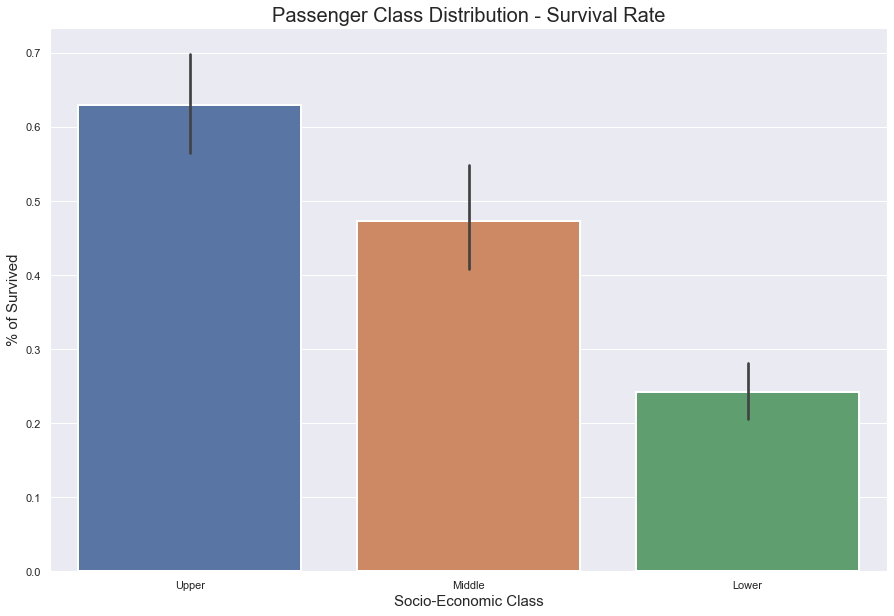

In [197]:
# Use plt.subplots() function to create figure space
plt.subplots(figsize = (15,10))

# Create barplot with sns.barplot()
sns.barplot(x='Pclass',
            y='Survived',
            data=train,
            linewidth=2)

# Set title and labels
plt.title('Passenger Class Distribution - Survival Rate', fontsize=20)
plt.xlabel('Socio-Economic Class', fontsize=15)
plt.ylabel('% of Survived', fontsize=15)
labels = ['Upper', 'Middle', 'Lower']

# Move the label to align it
val = [0,1,2]
plt.xticks(val, labels)

Sooo higher socio-economic status = higher survival rate

### Kernel density plot with the same data - sns.kdeplot()

([<matplotlib.axis.XTick at 0x1d592ed6f28>,
 <a list of 3 Text xticklabel objects>)

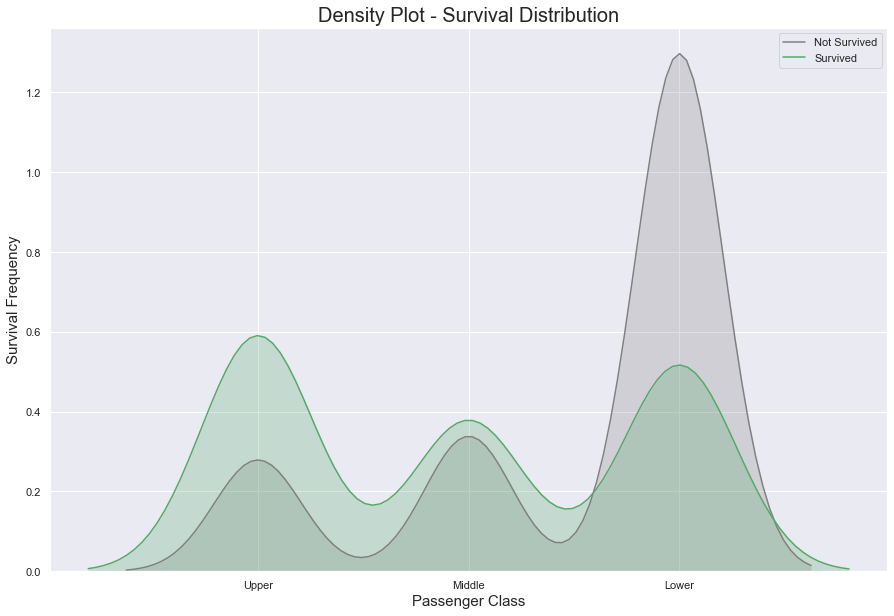

In [198]:
# Kernel density plot - create figure space using plt.figure() and not plt.subplots()
fig = plt.figure(figsize=(15,10))

# Create the plot using sns.kdeplot()
ax1 = sns.kdeplot(train.Pclass[train.Survived==0],   # data subset
                  color='gray',                      # color
                  shade=True,                        # shade
                  label='Not Survived'               # label
                 )

ax1 = sns.kdeplot(train.Pclass[train.Survived==1],
                  color='g',
                  shade=True,
                  label='Survived'
                 )

# Set title and labels
plt.title('Density Plot - Survival Distribution', fontsize=20) # title
plt.xlabel('Passenger Class', fontsize=15)                     # x
plt.ylabel('Survival Frequency', fontsize=15)                  # y

# Set x-ticks and labels
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels)

Take a look at this and check out the difference between the top of the gray density shading vs the green shading. The difference is much higher in the Lower class vs. the Upper where it is actually negative or positive depending on how you see the graph.